In [33]:
import pandas as pd
import seaborn as se

from sklearn.feature_selection import SelectKBest,f_regression,f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import PowerTransformer
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('encoded_df.csv')

In [3]:
df = df.drop(df[df.home_results > 2].index)

In [4]:
df = df.drop(columns=['Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 
                      'losers', 'win_rank', 'lose_rank', 
                      'null', 'half', 'quart', 'three_quart'])

In [5]:
df.columns

Index(['Wk', 'home_rank', 'away_rank', 'home_team_code', 'away_team_code',
       'home_results', 'day_code', 'hours'],
      dtype='object')

In [7]:
# Selected Columns
features=['Wk', 'home_rank', 'away_rank', 'home_team_code', 'away_team_code',
        'day_code', 'hours']
target='home_results'
# X & Y
X=df[features]
Y=df[target]


In [8]:
# Handling AlphaNumeric Features
X=pd.get_dummies(X)

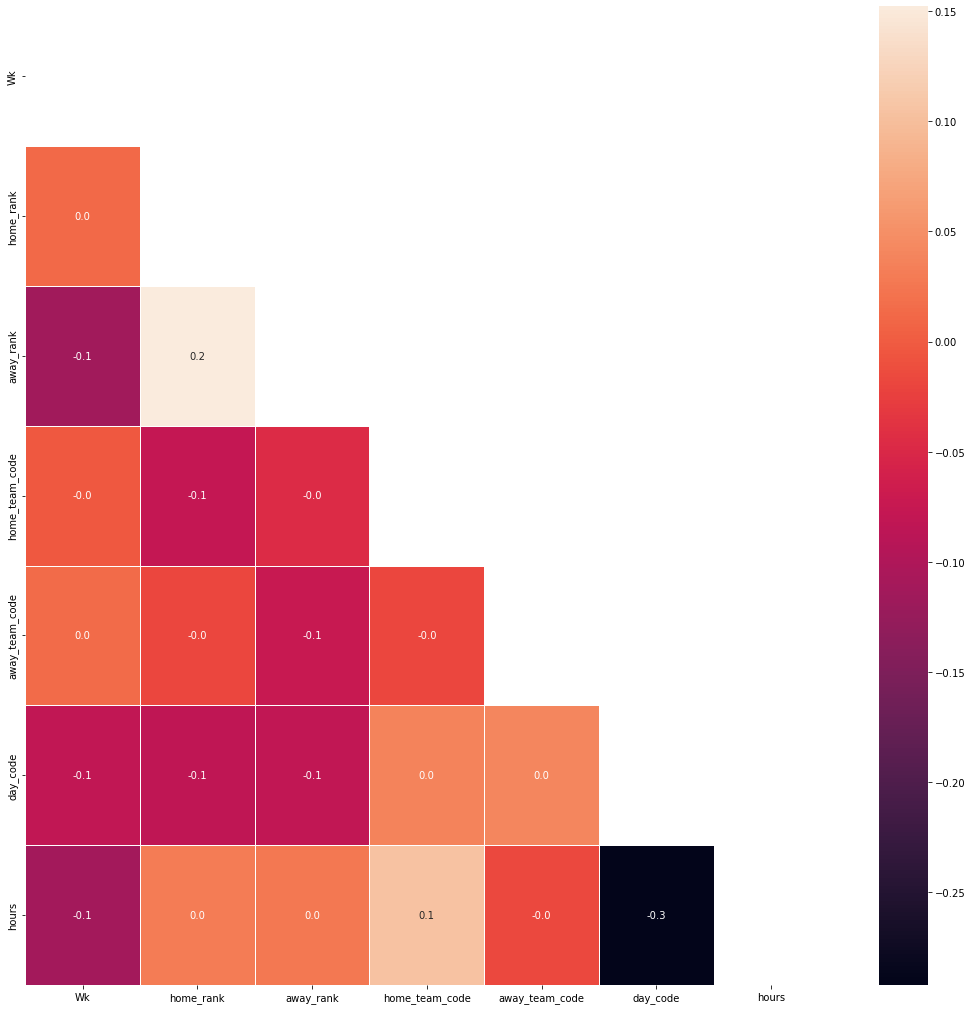

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

In [12]:
def dropHighCorrelationFeatures(X):
        cor_matrix = X.corr()
        upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
        if to_drop!=[]: return X.drop(to_drop, axis=1)
        else: return X
X=dropHighCorrelationFeatures(X)
X.head()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82969/3073878435.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,Wk,home_rank,away_rank,home_team_code,away_team_code,day_code,hours
0,1,99,99,32,37,5,19
1,1,99,99,34,49,5,17
2,1,99,99,42,224,5,16
3,1,99,99,76,122,5,22
4,1,99,99,74,77,5,15


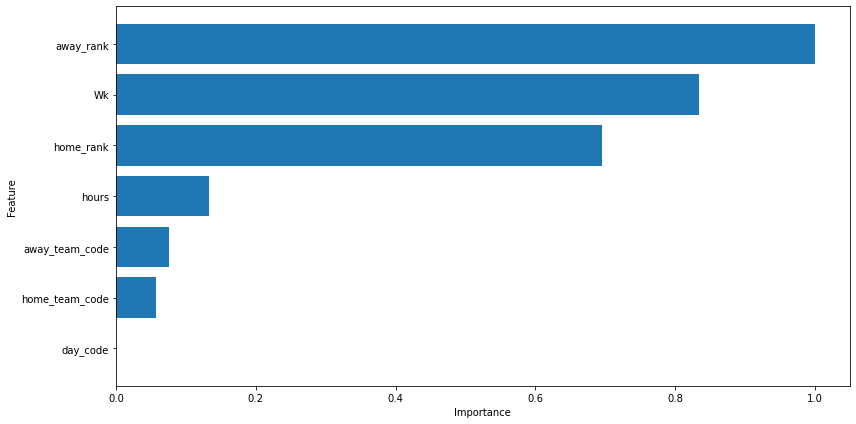

In [17]:
def get_feature_importance(X,Y,score_func):
    fit = SelectKBest(score_func=score_func, k=X.shape[1]).fit(X,Y)
    dfscores,dfcolumns = pd.DataFrame(fit.scores_),pd.DataFrame(X.columns)
    df = pd.concat([dfcolumns,dfscores],axis=1)
    df.columns = ['features','Score'] 
    df['Score']=MinMaxScaler().fit_transform(np.array(df['Score']).reshape(-1,1))
    result=dict(df.values)
    val=dict(sorted(result.items(), key=lambda item: item[1],reverse=False))
    keylist=[]
    for key, value in val.items():
        if value < 0.01: keylist.append(key)
    X=X.drop(keylist,axis=1)
    plt.figure(figsize = (12, 6))
    plt.barh(range(len(val)), list(val.values()), align='center')
    plt.yticks(range(len(val)),list(val.keys()))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    return X
X=get_feature_importance(X,Y,score_func=f_classif)
        

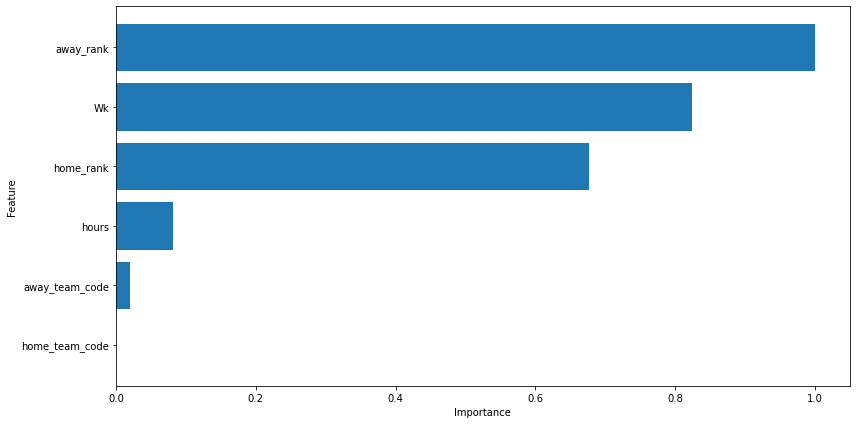

In [18]:

def get_feature_importance(X,Y,score_func):
    fit = SelectKBest(score_func=score_func, k=X.shape[1]).fit(X,Y)
    dfscores,dfcolumns = pd.DataFrame(fit.scores_),pd.DataFrame(X.columns)
    df = pd.concat([dfcolumns,dfscores],axis=1)
    df.columns = ['features','Score'] 
    df['Score']=MinMaxScaler().fit_transform(np.array(df['Score']).reshape(-1,1))
    result=dict(df.values)
    val=dict(sorted(result.items(), key=lambda item: item[1],reverse=False))
    keylist=[]
    for key, value in val.items():
        if value < 0.01: keylist.append(key)
    X=X.drop(keylist,axis=1)
    plt.figure(figsize = (12, 6))
    plt.barh(range(len(val)), list(val.values()), align='center')
    plt.yticks(range(len(val)),list(val.keys()))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    return X
X=get_feature_importance(X,Y,score_func=f_classif)

In [21]:
columns=X.columns
X=RobustScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()

,Wk,home_rank,away_rank,away_team_code,hours
0,-0.857143,0.0,0.0,-0.681818,0.6
1,-0.857143,0.0,0.0,-0.572727,0.2
2,-0.857143,0.0,0.0,1.018182,0.0
3,-0.857143,0.0,0.0,0.090909,1.2
4,-0.857143,0.0,0.0,-0.318182,-0.2


In [22]:
# Data split for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


In [25]:
# resampling target
resample=SMOTEENN()
X_train,Y_train=resample.fit_resample(X_train,Y_train)

In [28]:
powertransformer=PowerTransformer()
X_train=powertransformer.fit_transform(X_train)
X_test=powertransformer.transform(X_test)

In [31]:
# Model Initialization
model=CatBoostClassifier()
model.fit(X_train,Y_train)


Learning rate set to 0.006082
0:	learn: 0.6889567	total: 60.7ms	remaining: 1m
1:	learn: 0.6844558	total: 61.9ms	remaining: 30.9s
2:	learn: 0.6803030	total: 63ms	remaining: 20.9s
3:	learn: 0.6766552	total: 64.2ms	remaining: 16s
4:	learn: 0.6725444	total: 65.2ms	remaining: 13s
5:	learn: 0.6682668	total: 66.1ms	remaining: 11s
6:	learn: 0.6641519	total: 67ms	remaining: 9.51s
7:	learn: 0.6605641	total: 68ms	remaining: 8.43s
8:	learn: 0.6569543	total: 69ms	remaining: 7.6s
9:	learn: 0.6535413	total: 69.9ms	remaining: 6.92s
10:	learn: 0.6496152	total: 70.9ms	remaining: 6.37s
11:	learn: 0.6452070	total: 71.9ms	remaining: 5.92s
12:	learn: 0.6412964	total: 73ms	remaining: 5.54s
13:	learn: 0.6373694	total: 74.1ms	remaining: 5.21s
14:	learn: 0.6345300	total: 75.2ms	remaining: 4.94s
15:	learn: 0.6315625	total: 76.2ms	remaining: 4.69s
16:	learn: 0.6280124	total: 77.2ms	remaining: 4.46s
17:	learn: 0.6248116	total: 78.2ms	remaining: 4.26s
18:	learn: 0.6207021	total: 79.1ms	remaining: 4.08s
19:	learn: 0

161:	learn: 0.3704399	total: 178ms	remaining: 920ms
162:	learn: 0.3695759	total: 179ms	remaining: 918ms
163:	learn: 0.3686634	total: 180ms	remaining: 915ms
164:	learn: 0.3678039	total: 180ms	remaining: 912ms
165:	learn: 0.3671104	total: 181ms	remaining: 909ms
166:	learn: 0.3663261	total: 182ms	remaining: 906ms
167:	learn: 0.3652243	total: 182ms	remaining: 903ms
168:	learn: 0.3645674	total: 183ms	remaining: 900ms
169:	learn: 0.3634404	total: 184ms	remaining: 897ms
170:	learn: 0.3624402	total: 184ms	remaining: 894ms
171:	learn: 0.3615356	total: 185ms	remaining: 891ms
172:	learn: 0.3611080	total: 186ms	remaining: 888ms
173:	learn: 0.3599263	total: 186ms	remaining: 885ms
174:	learn: 0.3593390	total: 187ms	remaining: 882ms
175:	learn: 0.3583930	total: 188ms	remaining: 879ms
176:	learn: 0.3573209	total: 189ms	remaining: 876ms
177:	learn: 0.3566178	total: 189ms	remaining: 874ms
178:	learn: 0.3557659	total: 190ms	remaining: 872ms
179:	learn: 0.3550855	total: 191ms	remaining: 869ms
180:	learn: 

424:	learn: 0.2317632	total: 354ms	remaining: 479ms
425:	learn: 0.2312102	total: 355ms	remaining: 478ms
426:	learn: 0.2308517	total: 355ms	remaining: 477ms
427:	learn: 0.2304091	total: 356ms	remaining: 476ms
428:	learn: 0.2301620	total: 357ms	remaining: 475ms
429:	learn: 0.2298788	total: 357ms	remaining: 474ms
430:	learn: 0.2295679	total: 358ms	remaining: 473ms
431:	learn: 0.2293349	total: 359ms	remaining: 472ms
432:	learn: 0.2287127	total: 360ms	remaining: 471ms
433:	learn: 0.2285943	total: 360ms	remaining: 470ms
434:	learn: 0.2282429	total: 361ms	remaining: 469ms
435:	learn: 0.2279139	total: 362ms	remaining: 468ms
436:	learn: 0.2275515	total: 362ms	remaining: 467ms
437:	learn: 0.2271840	total: 363ms	remaining: 466ms
438:	learn: 0.2268337	total: 364ms	remaining: 465ms
439:	learn: 0.2266205	total: 364ms	remaining: 464ms
440:	learn: 0.2262623	total: 365ms	remaining: 463ms
441:	learn: 0.2259523	total: 366ms	remaining: 462ms
442:	learn: 0.2256809	total: 366ms	remaining: 461ms
443:	learn: 

690:	learn: 0.1671691	total: 530ms	remaining: 237ms
691:	learn: 0.1669387	total: 530ms	remaining: 236ms
692:	learn: 0.1667385	total: 531ms	remaining: 235ms
693:	learn: 0.1665274	total: 532ms	remaining: 234ms
694:	learn: 0.1662015	total: 532ms	remaining: 234ms
695:	learn: 0.1659301	total: 533ms	remaining: 233ms
696:	learn: 0.1658193	total: 534ms	remaining: 232ms
697:	learn: 0.1656890	total: 535ms	remaining: 231ms
698:	learn: 0.1654319	total: 535ms	remaining: 231ms
699:	learn: 0.1653219	total: 536ms	remaining: 230ms
700:	learn: 0.1652401	total: 537ms	remaining: 229ms
701:	learn: 0.1650465	total: 537ms	remaining: 228ms
702:	learn: 0.1648285	total: 538ms	remaining: 227ms
703:	learn: 0.1645460	total: 539ms	remaining: 227ms
704:	learn: 0.1643862	total: 540ms	remaining: 226ms
705:	learn: 0.1642552	total: 540ms	remaining: 225ms
706:	learn: 0.1640035	total: 541ms	remaining: 224ms
707:	learn: 0.1638858	total: 542ms	remaining: 223ms
708:	learn: 0.1636985	total: 542ms	remaining: 223ms
709:	learn: 

925:	learn: 0.1268354	total: 706ms	remaining: 56.4ms
926:	learn: 0.1267121	total: 706ms	remaining: 55.6ms
927:	learn: 0.1265990	total: 707ms	remaining: 54.9ms
928:	learn: 0.1263775	total: 708ms	remaining: 54.1ms
929:	learn: 0.1262776	total: 709ms	remaining: 53.4ms
930:	learn: 0.1260485	total: 710ms	remaining: 52.6ms
931:	learn: 0.1259888	total: 711ms	remaining: 51.9ms
932:	learn: 0.1258819	total: 712ms	remaining: 51.1ms
933:	learn: 0.1258160	total: 713ms	remaining: 50.4ms
934:	learn: 0.1256338	total: 714ms	remaining: 49.6ms
935:	learn: 0.1255339	total: 714ms	remaining: 48.8ms
936:	learn: 0.1254130	total: 715ms	remaining: 48.1ms
937:	learn: 0.1252878	total: 716ms	remaining: 47.3ms
938:	learn: 0.1250932	total: 717ms	remaining: 46.6ms
939:	learn: 0.1249505	total: 718ms	remaining: 45.8ms
940:	learn: 0.1247566	total: 719ms	remaining: 45.1ms
941:	learn: 0.1245038	total: 720ms	remaining: 44.3ms
942:	learn: 0.1243922	total: 721ms	remaining: 43.6ms
943:	learn: 0.1242627	total: 722ms	remaining: 

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       107
           1       0.45      0.63      0.52        59

    accuracy                           0.59       166
   macro avg       0.59      0.60      0.58       166
weighted avg       0.63      0.59      0.60       166



/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


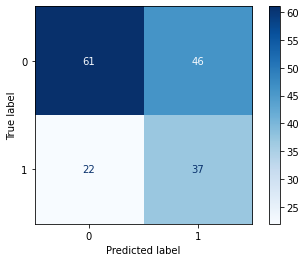

In [34]:
# Confusion Matrix
plot_confusion_matrix(model,X_test,Y_test,cmap=plt.cm.Blues)
# Classification Report
print(classification_report(Y_test,model.predict(X_test)))
